# Linear Regression Assignment - Bike Sharing Demand Analysis

# Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
- Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


**Business Goal:**
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

# Notebook Contents

I)   Reading and Inspecting Data <br>
II)   Data Cleaning (Dropping Insignificant Columns) <br>
III)  Data Visualization and Exploratory Data Analysis <br>
IV)   Data Preparation / Transformation <br>
V)    Splitting the Data into Training and Testing Sets and Rescaling <br>
VI)   Dividing into X and Y Sets for Model Building <br>
VII)  Model-1 - Building and Checking the First Model Before Feature Elimination <br>
VIII) Using RFE for Automated Feature Elimination <br>
IX)   Manual Feature Elimination <br>
X)    Making Predictions and Comparing R-Squared Values<br>
XI)   Model Evaluation and Analysis <br>
XII)  Conclusion and Recommendations <br>

# I) Reading and Inspecting Data

In [913]:
#importing necessary libraries for reading data and exploratory data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [914]:
#importing the warnings
import warnings
warnings.filterwarnings (action="ignore")

#### 1. Reading the CSV file

In [915]:
# Reading the 'day.csv' file into a Pandas dataframe 'df'.
df = pd.read_csv('day.csv')

#### 2. Preliminary Inspection

In [916]:
# Checking the dataframe's head
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [917]:
# Checking row and column count
df.shape

(730, 16)

In [918]:
# Using info() to check the column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [919]:
# Checking for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [920]:
# Checking some basic statistical figures
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [921]:
# Checking for duplicate rows in the dataset
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


#### 3. Observations

1. The given dataset has 730 rows (records) and 16 columns.
2. There are no null values present in any of the columns.
3. There are no duplicate rows present in the dataset.
4. The dataset looks good to proceed ahead with.

## II) Data Cleaning (Dropping Insignificant Columns)

In [922]:
# 'instant' column can be dropped as it is redundant. Pandas by default assigns row index, so this column is not needed.
df.drop('instant', axis=1, inplace=True)

In [923]:
# 'dteday' column can be dropped as it is redundant in the presence of 'yr' and 'mnth'.
df.drop('dteday', axis=1, inplace=True)

In [924]:
# 'casual' and 'registered' columns can be dropped as they have no significance. Total count (casual + registered) is our target variable.
df.drop(['casual', 'registered'] , axis=1, inplace=True)

## III) Data Visualization and Exploratory Data Analysis

#### 1. Visualizing Numeric Variables

In [925]:
# Choosing the numerical columns for the pair plot
plot_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
plot_df = df[plot_columns]

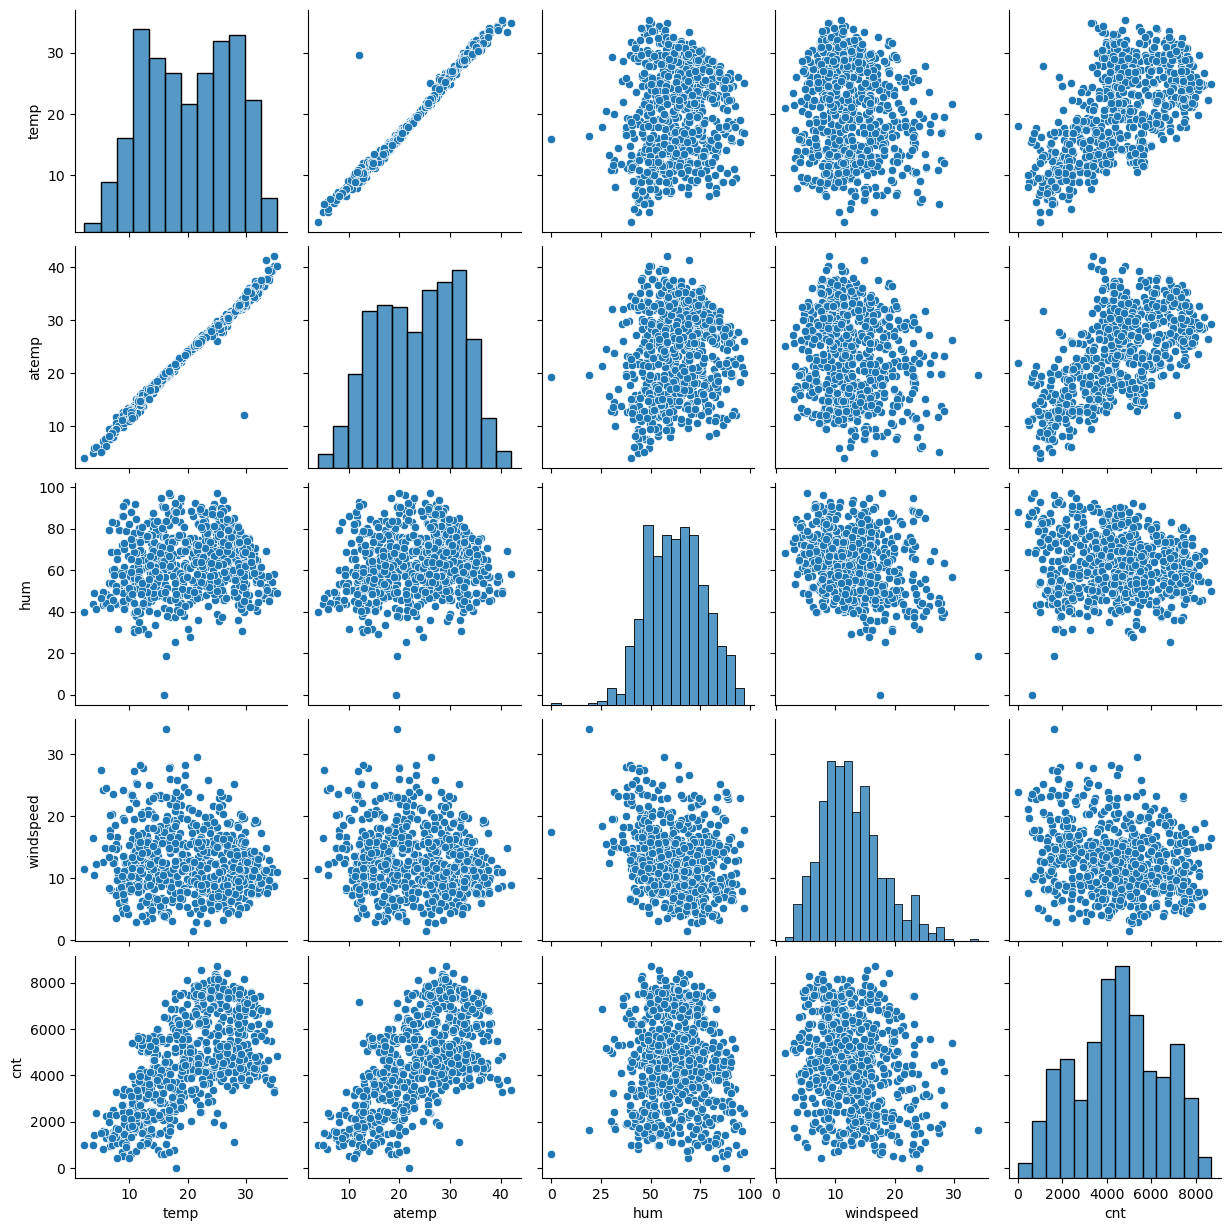

In [926]:
# Plotting a pair plot of the above columns
sns.pairplot(plot_df)
plt.show()

#### Observations

1. Temperature, i.e both temp and atemp, seems to be significantly affecting the rental count. A positive slope can be noticed in the scatter plots of the target variable with temperature.
2. 'temp' and 'atemp' have high correlation as the temp v/s atemp plots show a perfectly linear relationship.
3. Plots of the rest of the variables (hum, windspeed) do not show any specific pattern.

#### 2. Visualizing Categorical Variables

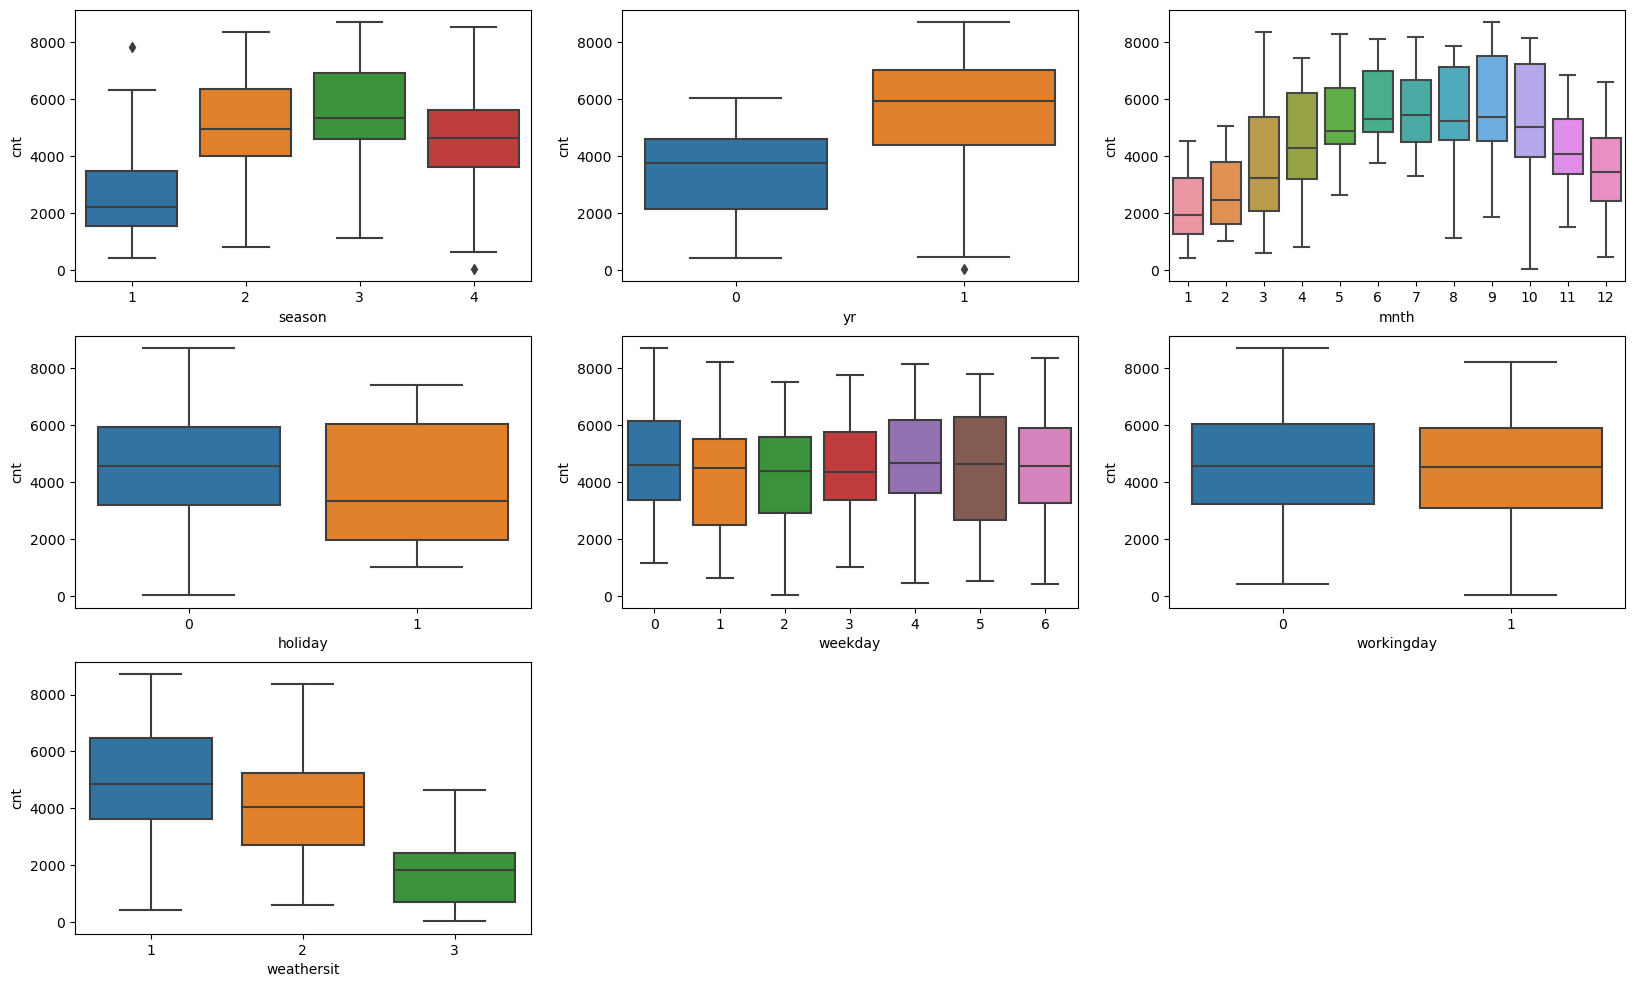

In [927]:
# Creating a subplot with boxplots of all categorical variables v/s the target variable 'cnt'.
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

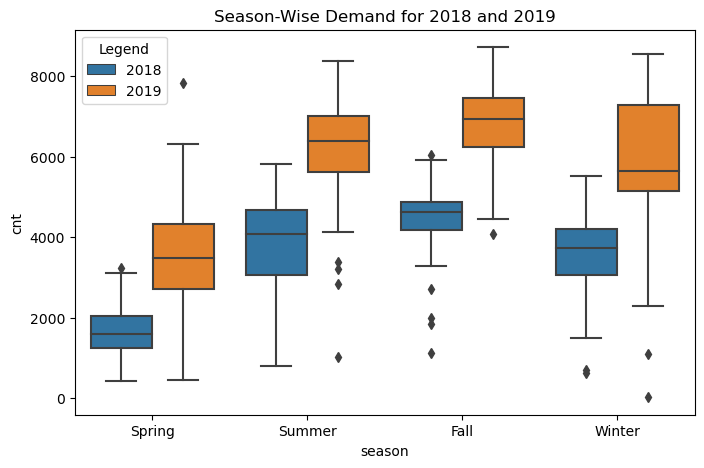

In [928]:
# Checking season-wise demand for both 2018 and 2019
plt.figure(figsize = (8, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = df)
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['2018', '2019']
plt.legend(handles, labels, loc='upper left', title='Legend')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Season-Wise Demand for 2018 and 2019')
plt.show()

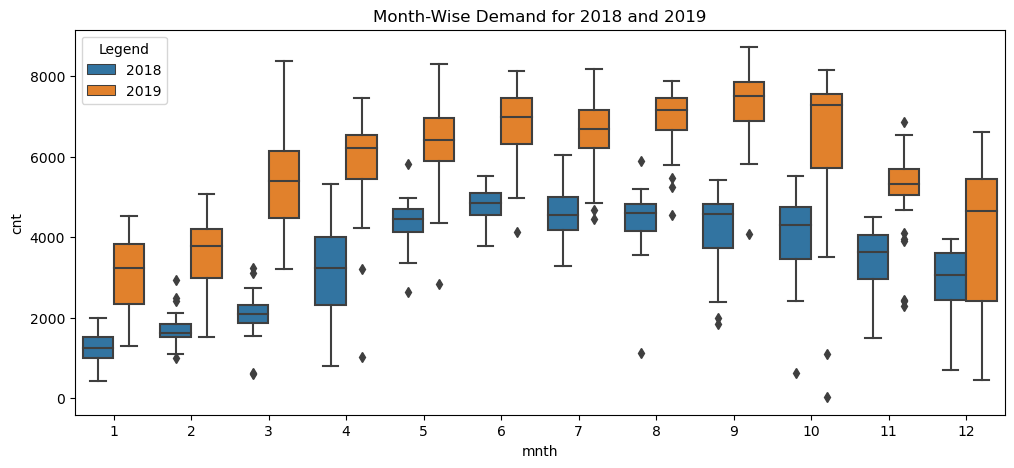

In [929]:
# Checking month-wise demand for both 2018 and 2019
plt.figure(figsize = (12, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'yr', data = df)
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['2018', '2019']
plt.legend(handles, labels, loc='upper left', title='Legend')
plt.title('Month-Wise Demand for 2018 and 2019')
plt.show()

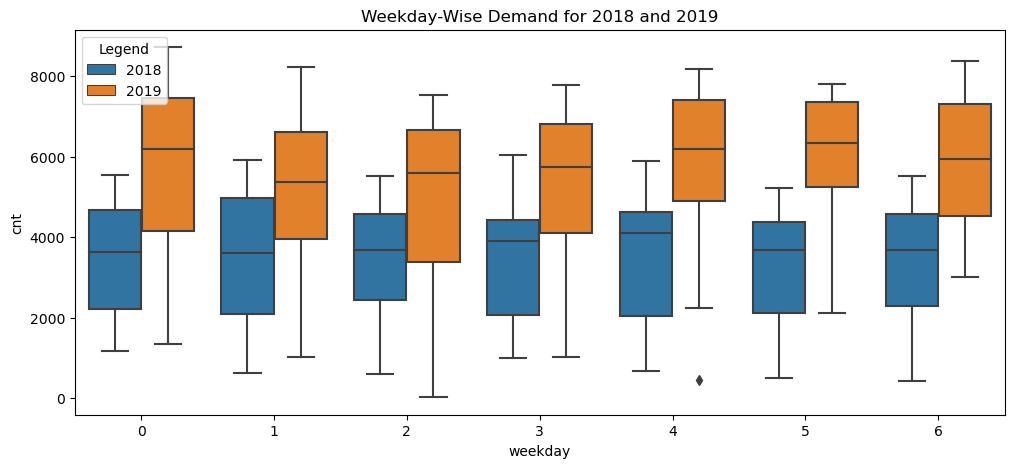

In [930]:
# Checking day-wise demand for both 2018 and 2019
plt.figure(figsize = (12, 5))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'yr', data = df)
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['2018', '2019']
plt.legend(handles, labels, loc='upper left', title='Legend')
plt.title('Weekday-Wise Demand for 2018 and 2019')
plt.show()

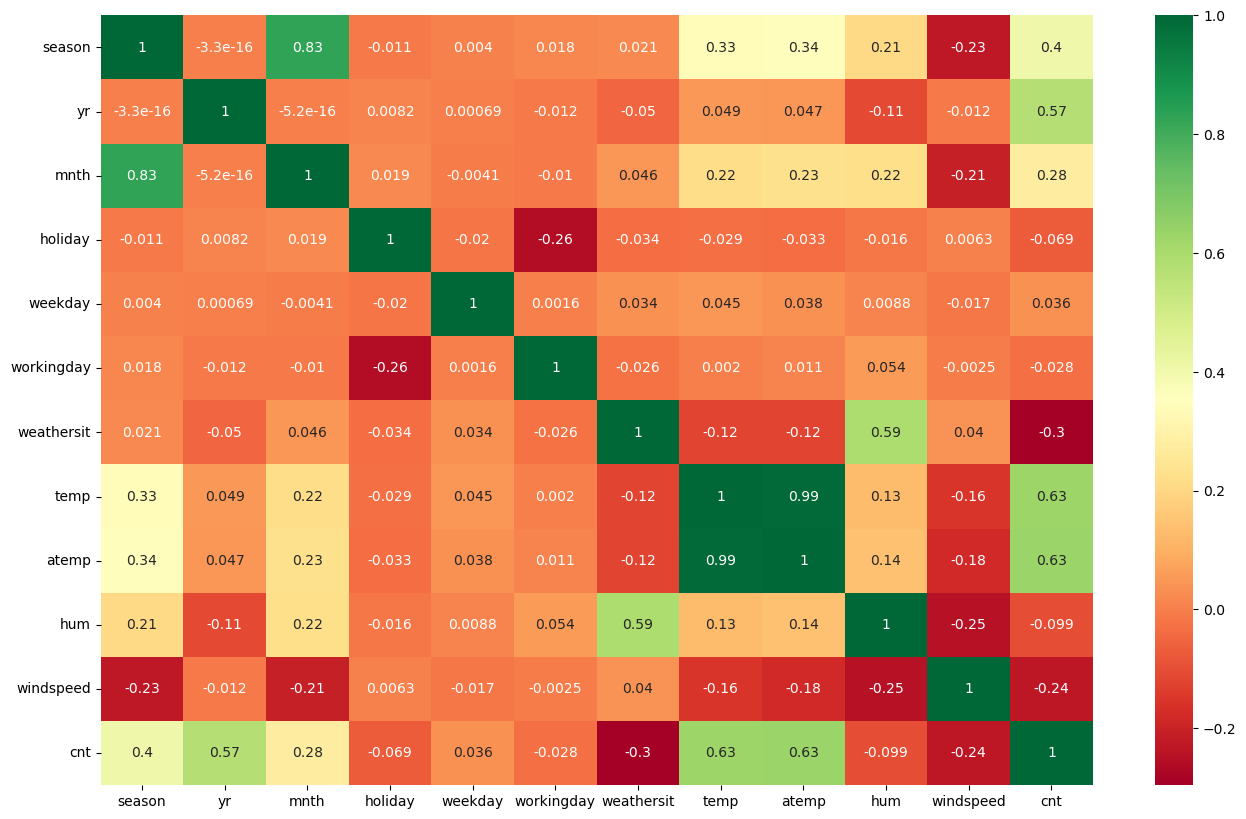

In [931]:
# Check the correlation between variables using a Heat Map
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="RdYlGn")
plt.show()

#### Observations From Exploratory Data Analysis

1. 2019 had much higher rental count than 2018.
2. Rental count is higher in the summer and fall seasons in both years.
2. Median rental count is lower on holidays.
4. Working day/weekend does not seem to have much effect on rental count.
5. Median rental count is more or less the same across all days of the week.
6. Rental count is higher in the months from June to September, for both years.
7. Weather situation has a significant impact on rental count; highest rental count is observed when the weather is clear (1), and lowest when there is snow (3). That is, rental count reduces when the weather becomes more adverse. Even though there is one more weather category defined in the data dictionary (4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog), we do not have any corresponding records in the dataset.
8. temp/atemp and yr (year) seem to have the highest correlation with the target variable cnt.
9. temp and atemp are very highly correlated variables and both signify more or less the same parameter. Hence, we will have to drop either of these two in the later stages.

## IV) Data Preparation / Transformation

#### Creating dummy variables for 'season' column

In [932]:
# Converting 'season' column values into categorical string values
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
df['season'] = df['season'].apply(lambda x: season_mapping[x])

In [933]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [934]:
# Get the dummy variables for the feature 'season' and store it in a new variable 'seasondummyvars'
seasondummyvars = pd.get_dummies(df['season'])

In [935]:
seasondummyvars.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Since we don't need 4 columns, we can drop the `fall` column, as the season can be identified with just the last 3 columns where : 
- `000` will correspond to `fall`
- `100` will correspond to `spring`
- `010` will correspond to `summer`
- `001` will correspond to `winter`

In [936]:
# Dropping the first column from seasondummyvars using 'drop_first = True'
seasondummyvars = pd.get_dummies(df['season'], drop_first = True)

In [937]:
# Adding the season dummy variables to the original dataframe
df = pd.concat([df, seasondummyvars], axis = 1)

In [938]:
# Now we can drop 'season' as we have created the corresponding dummy variables
df.drop(['season'], axis = 1, inplace = True)

In [939]:
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


#### Creating dummy variables for 'weathersit' column

In [940]:
# Converting 'weathersit' column values into categorical string values
weather_mapping = {1: 'clear', 2: 'mist', 3: 'light snow', 4: 'heavy rain'}
df['weathersit'] = df['weathersit'].apply(lambda x: weather_mapping[x])

In [941]:
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [942]:
# Get the dummy variables for the feature 'season' and store it in a new variable 'weatherdummyvars'
weatherdummyvars = pd.get_dummies(df['weathersit'])
weatherdummyvars.head()

,clear,light snow,mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In this case, we will not be dropping the first column, as there are 4 weather categories as per the data dictionary. So, 3 dummy variables are ideally needed.

In [943]:
# Adding the weather dummy variables to the original dataframe
df = pd.concat([df, weatherdummyvars], axis = 1)

In [944]:
# Now we can drop 'weathersit' as we have created the corresponding dummy variables
df.drop(['weathersit'], axis = 1, inplace = True)
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,clear,light snow,mist
0,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,1
1,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,1
2,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0
3,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,1,0,0
4,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,1,0,0


- `000` will correspond to `heavy rain`
- `100` will correspond to `clear`
- `010` will correspond to `light snow`
- `001` will correspond to `mist`

#### Creating dummy variables for 'mnth' column

In [945]:
# Converting 'mnth' column values into categorical string values
month_mapping = {1:'month_01', 2:'month_02', 3:'month_03', 4:'month_04', 5:'month_05', 6:'month_06', 7:'month_07', 8:'month_08', 9:'month_09', 10:'month_10', 11:'month_11', 12:'month_12'}
df['mnth'] = df['mnth'].apply(lambda x: month_mapping[x])

In [946]:
# Get the dummy variables for 'mnth' and store it in a new variable 'monthdummyvars'
monthdummyvars = pd.get_dummies(df['mnth'])
monthdummyvars.head()

,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [947]:
# Dropping the first column using 'drop_first = True'
monthdummyvars = pd.get_dummies(df['mnth'], drop_first = True)
monthdummyvars.head()

,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


- `0` in all months' cells will correspond to January month

In [948]:
# Adding the month dummy variables to the original dataframe
df = pd.concat([df, monthdummyvars], axis = 1)

In [949]:
# Now we can drop 'mnth' as we have created the corresponding dummy variables
df.drop(['mnth'], axis = 1, inplace = True)
df.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,clear,light snow,mist,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,0,0,1,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,2,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Creating dummy variables for 'weekday' column

In [950]:
# Converting 'weekday' column values into categorical string values
weekday_mapping = {0:'wkday_0', 1:'wkday_1', 2:'wkday_2', 3:'wkday_3', 4:'wkday_4', 5:'wkday_5', 6:'wkday_6'}
df['weekday'] = df['weekday'].apply(lambda x: weekday_mapping[x])

In [951]:
# Get the dummy variables for 'mnth' and store it in a new variable 'monthdummyvars'
weekdayummyvars = pd.get_dummies(df['weekday'])
weekdayummyvars.head()

,wkday_0,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0


In [952]:
# Dropping the first column using 'drop_first = True'
weekdayummyvars = pd.get_dummies(df['weekday'], drop_first = True)
weekdayummyvars.head()

,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


- `0` in all weekday cells will correspond to weekday 0.

In [953]:
# Adding the weekday dummy variables to the original dataframe
df = pd.concat([df, weekdayummyvars], axis = 1)

In [954]:
# Now we can drop 'weekday' as we have created the corresponding dummy variables
df.drop(['weekday'], axis = 1, inplace = True)

In [955]:
pd.set_option('display.max_columns', 50)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,clear,light snow,mist,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## V): Splitting the Data into Training and Testing Sets and Rescaling

In [956]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively.
np.random.seed(0)

# Splitting the data in a 70:30 train:test ratio
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features Using Min-Max Scaling

In [957]:
from sklearn.preprocessing import MinMaxScaler

In [958]:
# We will use Min-Max scaler
scaler = MinMaxScaler()

In [959]:
# Apply scaler() to all the numerical columns except the dummy variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [960]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,clear,light snow,mist,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [961]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,clear,light snow,mist,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.627451,0.029412,0.343137,0.066667,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.483958,0.169124,0.475223,0.249689,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


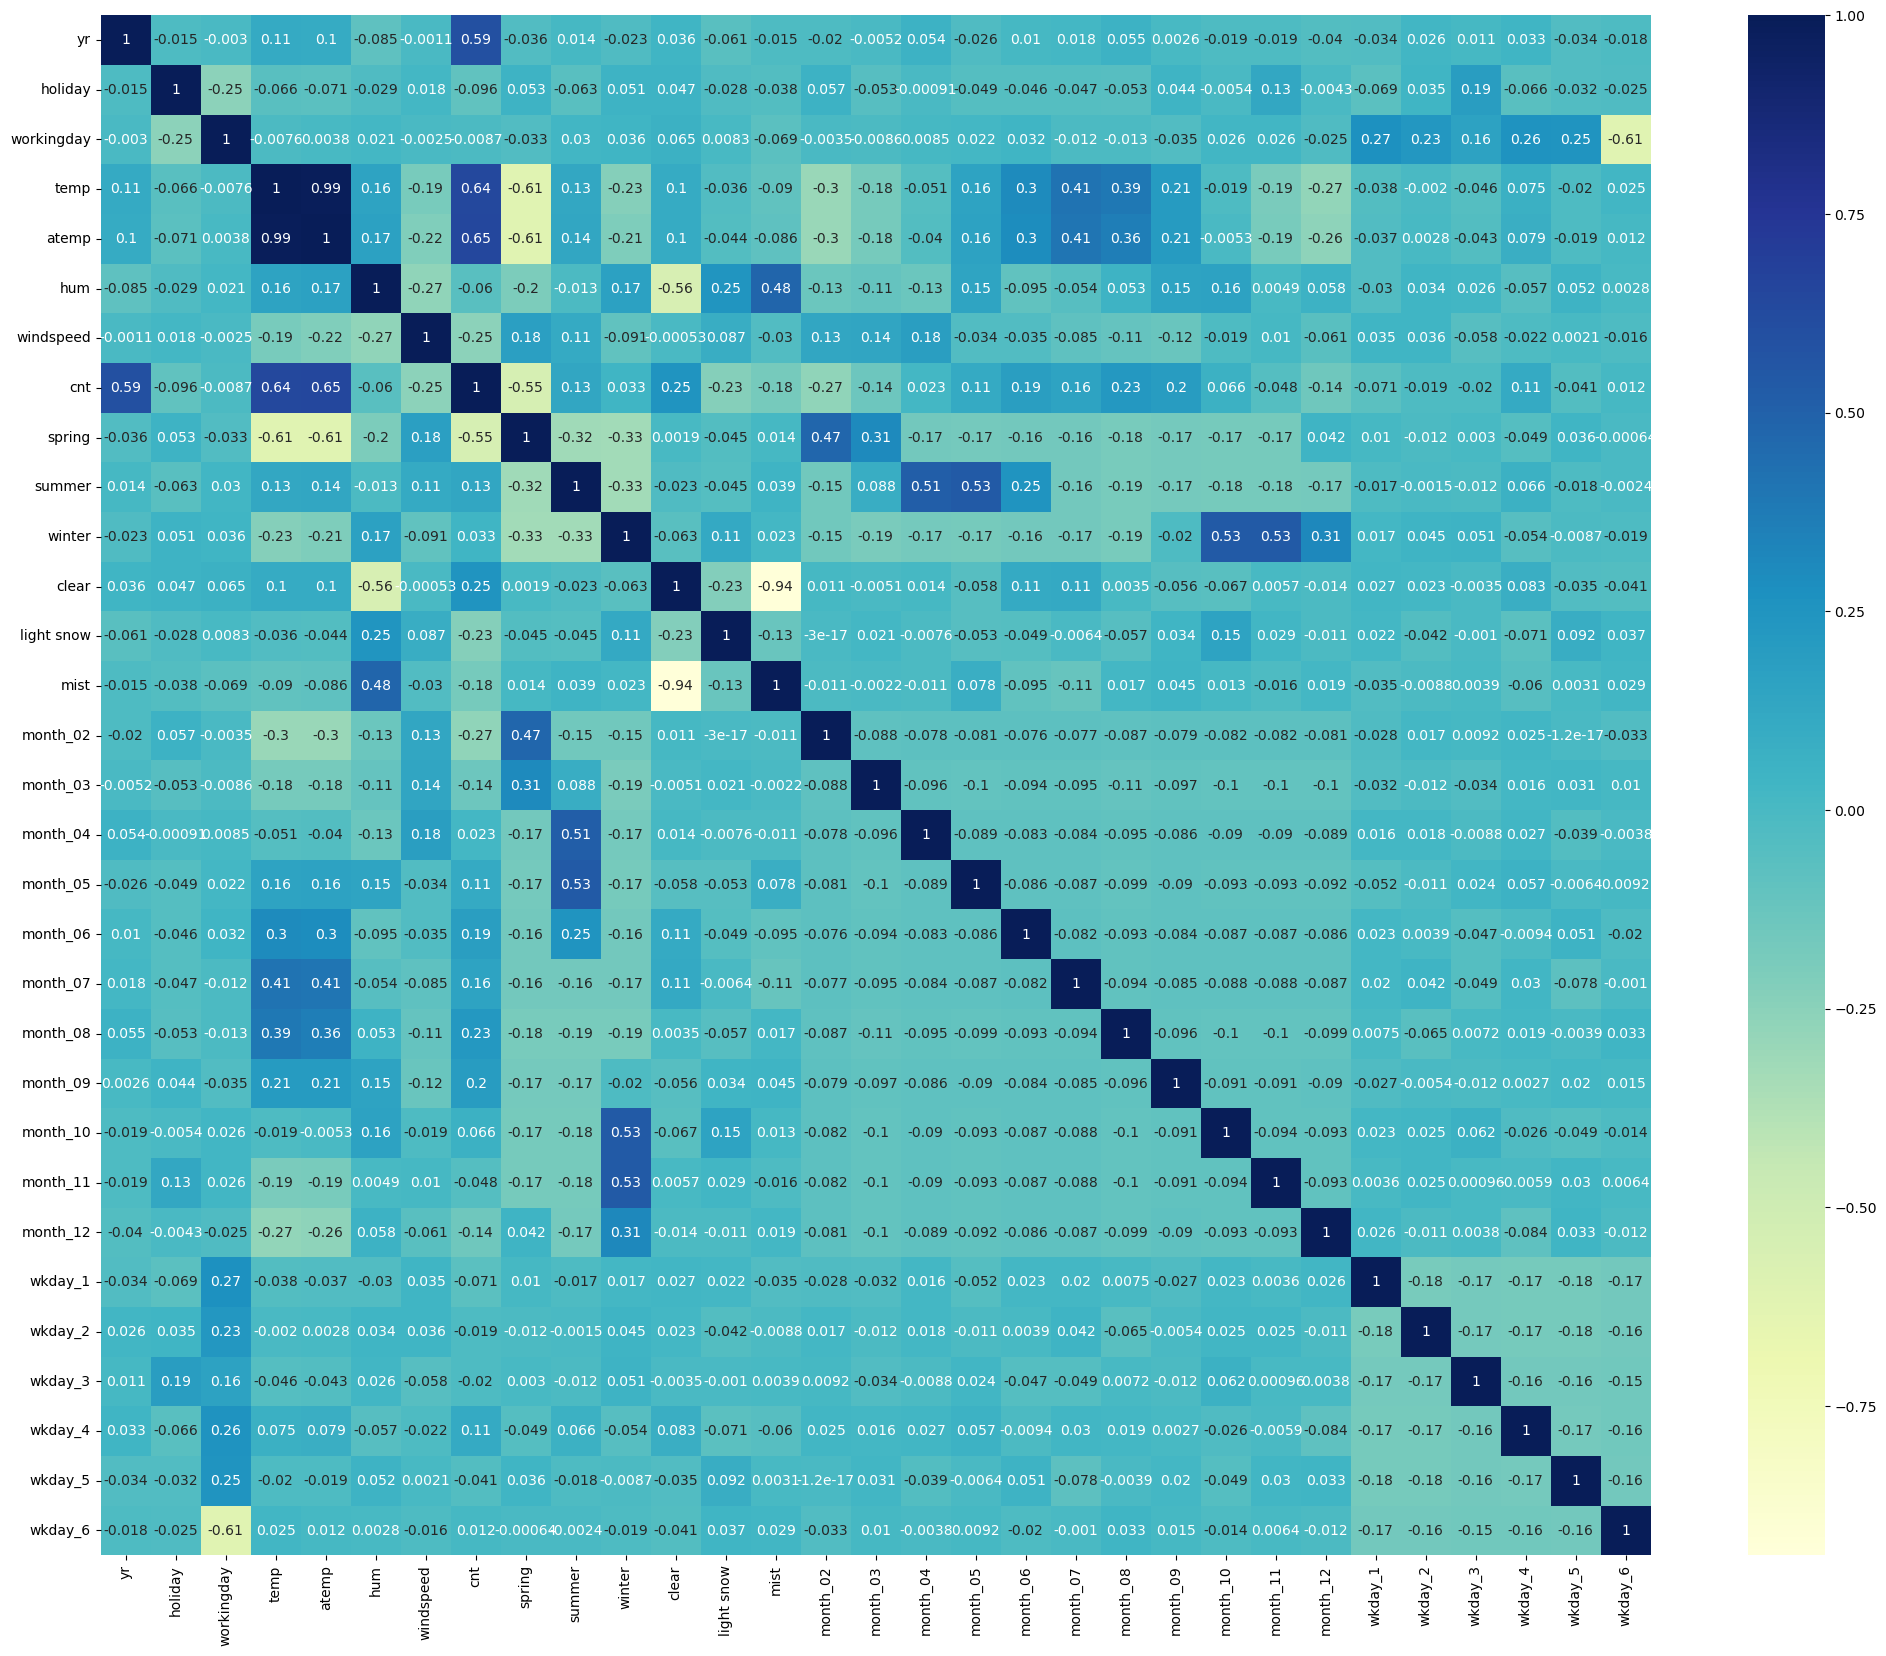

In [962]:
# Check the correlation coefficients to see which variables are highly correlated, using a Heat Map
plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [963]:
# Listing down the predictor variables in descending order of correlation with respect to the target variable 'cnt'
correlation_matrix = df_train.corr()
correlations = correlation_matrix['cnt'].drop('cnt')
sorted_correlations = correlations.abs().sort_values(ascending=False)
print(sorted_correlations)

atemp         0.646475
temp          0.643517
yr            0.591508
spring        0.548871
month_02      0.270287
windspeed     0.253794
clear         0.251548
month_08      0.227229
light snow    0.226598
month_09      0.201327
month_06      0.187821
mist          0.175530
month_07      0.157812
month_12      0.143598
month_03      0.137537
summer        0.134343
month_05      0.113027
wkday_4       0.110430
holiday       0.095961
wkday_1       0.071188
month_10      0.065692
hum           0.059993
month_11      0.048130
wkday_5       0.040566
winter        0.032636
month_04      0.022998
wkday_3       0.019578
wkday_2       0.018885
wkday_6       0.012496
workingday    0.008723
Name: cnt, dtype: float64


#### Observations

1. Top 4 correlated variables with target variable, along with the correlation coefficients:
    (a) atemp - 0.64
    (b) temp - 0.64
    (c) yr - 0.59
    (d) spring - (-0.55)
 

## VI) Dividing into X and Y Sets for Model Building

In [964]:
# Importing some necessary statsmodels and sklearn functions
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

In [965]:
# As y is the dependent variable, we will remove the target variable 'cnt' from y by popping it out.
y_train = df_train.pop('cnt')
X_train = df_train

In [966]:
# Defining a function for VIF calculation of the model
def VIF_calc(df1):
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [967]:
# Defining a function to build a model from the dataframe by adding constant, which returns statsmodel summary
def build_LR_model_sm(df2):
    X_train_sm = sm.add_constant(df2)
    lm = sm.OLS(y_train,X_train_sm).fit()
    return print(lm.summary())

## VII) Model-1 - Building and Checking the First Model Before Feature Elimination

We will build the first model before eliminating any feature variables, to assess how good of a starting point we have.

In [968]:
# Checking the number of predictor variables
X_train.shape

(510, 30)

In [969]:
# Building the first model using the user defined function
build_LR_model_sm(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     94.48
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          4.09e-178
Time:                        13:25:12   Log-Likelihood:                 523.87
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     480   BIC:                            -860.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1332      0.034      3.909      0.0

In [970]:
# Checking the VIF values
VIF_calc(X_train)

,Features,VIF
10,clear,72.10
3,temp,67.04
2,workingday,66.33
4,atemp,55.88
12,mist,44.90
24,wkday_1,42.92
25,wkday_2,42.04
28,wkday_5,41.09
27,wkday_4,40.36
26,wkday_3,37.42


So, we start off with 30 predictor variables in total.

#### Observations

1. There are lot of insignificant variables with p-value > 0.05.
2. There is high multi-collinearity  among the predictor variables.
3. Even though the adjusted R-squared value looks good, this model is not useable as-is, feature elimination is definitely needed.

## VIII) Using RFE for Automated Feature Elimination

In [971]:
# Importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Importing statsmodel library and necessary functions
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Eliminating 5 variables using RFE

In [972]:
# Running RFE with the output number of the variable equal to 25
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [973]:
# List of all variables along with details on whether they are selected or not
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('clear', True, 1),
 ('light snow', True, 1),
 ('mist', True, 1),
 ('month_02', False, 2),
 ('month_03', True, 1),
 ('month_04', True, 1),
 ('month_05', True, 1),
 ('month_06', True, 1),
 ('month_07', False, 3),
 ('month_08', True, 1),
 ('month_09', True, 1),
 ('month_10', True, 1),
 ('month_11', False, 4),
 ('month_12', False, 5),
 ('wkday_1', True, 1),
 ('wkday_2', True, 1),
 ('wkday_3', True, 1),
 ('wkday_4', True, 1),
 ('wkday_5', True, 1),
 ('wkday_6', False, 6)]

In [974]:
# Checking which 15 variables have been selected
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'clear', 'light snow', 'mist', 'month_03',
       'month_04', 'month_05', 'month_06', 'month_08', 'month_09', 'month_10',
       'wkday_1', 'wkday_2', 'wkday_3', 'wkday_4', 'wkday_5'],
      dtype='object')

In [975]:
# Checking the variables which have been dropped
X_train.columns[~rfe.support_]

Index(['month_02', 'month_07', 'month_11', 'month_12', 'wkday_6'], dtype='object')

### Model - 2 : Checking the model after eliminating 5 variables using RFE

In [976]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [977]:
# Building the model by calling user defined function 'build_LR_model_sm'
build_LR_model_sm(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.8
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          8.60e-183
Time:                        13:25:13   Log-Likelihood:                 522.87
No. Observations:                 510   AIC:                            -995.7
Df Residuals:                     485   BIC:                            -889.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1434      0.030      4.801      0.0

In [978]:
# Checking VIF
VIF_calc(X_train_rfe)

,Features,VIF
2,workingday,65.54
3,temp,62.05
4,atemp,55.27
10,clear,54.06
20,wkday_1,42.05
21,wkday_2,41.18
24,wkday_5,40.21
23,wkday_4,39.55
22,wkday_3,36.60
12,mist,34.87


#### Observations

We can observe that there are still a lot of insignificant variables, and there is very high multicollinearity as well. Hence, we will perform RFE once more and eliminate another 5 variables.

In [979]:
# Running RFE with the output number of the variable equal to 20, i.e to eliminate another 5 variables
lm = LinearRegression()
lm.fit(X_train_rfe, y_train)

rfe = RFE(lm, n_features_to_select=20)
rfe = rfe.fit(X_train_rfe, y_train)

In [980]:
# List of all variables along with details on whether they are selected or not
list(zip(X_train_rfe.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('clear', True, 1),
 ('light snow', True, 1),
 ('mist', True, 1),
 ('month_03', True, 1),
 ('month_04', True, 1),
 ('month_05', True, 1),
 ('month_06', True, 1),
 ('month_08', True, 1),
 ('month_09', True, 1),
 ('month_10', True, 1),
 ('wkday_1', False, 5),
 ('wkday_2', False, 6),
 ('wkday_3', False, 4),
 ('wkday_4', False, 2),
 ('wkday_5', False, 3)]

In [981]:
# Checking which 15 variables have been selected
col = X_train_rfe.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'clear', 'light snow', 'mist', 'month_03',
       'month_04', 'month_05', 'month_06', 'month_08', 'month_09', 'month_10'],
      dtype='object')

In [982]:
# Checking the variables which have been dropped
X_train_rfe.columns[~rfe.support_]

Index(['wkday_1', 'wkday_2', 'wkday_3', 'wkday_4', 'wkday_5'], dtype='object')

#### Checking the model again after second round of RFE

In [983]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe2 = X_train_rfe[col]

In [984]:
# Building the model by calling user defined function 'build_LR_model_sm'
build_LR_model_sm(X_train_rfe2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.9
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.65e-186
Time:                        13:25:13   Log-Likelihood:                 518.97
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     490   BIC:                            -913.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1442      0.030      4.834      0.0

In [985]:
# Checking VIF
VIF_calc(X_train_rfe2)

,Features,VIF
3,temp,62.04
4,atemp,55.26
10,clear,53.66
12,mist,34.64
8,summer,7.14
7,spring,6.37
9,winter,4.96
11,light snow,4.35
15,month_05,3.43
14,month_04,3.10


#### Observations

'temp' and 'atemp' are highly correlated (as evident from EDA performed, as well as the VIF values), and they would essentially convey the same thing. So, it makes sense to drop 'atemp'. Statistically, we can also observe in the above summary that atemp has a high p-value and high VIF.

## IX) Manual Feature Elimination

So now, we have brought down the number of variables from 30 to 20, by doing RFE in two steps. We will not use RFE anymore and will use manual feature elimination to further eliminate predictor variables.

### Model - 3

In [986]:
# We will first drop 'atemp' as mentioned above, since it has both high p-value as well as high VIF.
X_train_3 = X_train_rfe2.drop(['atemp'], axis = 1)

In [987]:
# Building the model by calling user defined function 'build_LR_model_sm'
build_LR_model_sm(X_train_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.2
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.40e-187
Time:                        13:25:13   Log-Likelihood:                 518.91
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     491   BIC:                            -919.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1436      0.030      4.826      0.0

In [988]:
# Checking VIF
VIF_calc(X_train_3)

,Features,VIF
9,clear,53.59
11,mist,34.59
7,summer,7.09
6,spring,6.32
8,winter,4.87
3,temp,4.50
10,light snow,4.33
14,month_05,3.43
13,month_04,3.09
15,month_06,2.28


#### Observations

We have a very good adjusted R-squared value of 0.84 to start off with, but we still need to further remove the insignificant and highly correlated variables.

### Model - 4

In [989]:
# Dropping variable 'summer' as it has a high p-value and high VIF
X_train_4 = X_train_3.drop(['summer'], axis = 1)

In [990]:
# Building the model by calling user defined function 'build_LR_model_sm'
build_LR_model_sm(X_train_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          4.33e-188
Time:                        13:25:13   Log-Likelihood:                 517.46
No. Observations:                 510   AIC:                            -998.9
Df Residuals:                     492   BIC:                            -922.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1588      0.028      5.598      0.0

In [991]:
# Checking VIF
VIF_calc(X_train_4)

,Features,VIF
8,clear,46.99
10,mist,31.13
6,spring,4.18
9,light snow,4.10
7,winter,3.80
3,temp,3.54
4,hum,1.94
12,month_04,1.83
15,month_08,1.78
13,month_05,1.69


#### Observations

month_10 has a higher p-value of 0.05, so we will eliminate it next.

### Model - 5

In [992]:
# Dropping variable 'month_10' as it has a high p-value
X_train_5 = X_train_4.drop(['month_10'], axis = 1)

In [993]:
# Building the model by calling user defined function 'build_LR_model_sm'
build_LR_model_sm(X_train_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     167.6
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.61e-187
Time:                        13:25:13   Log-Likelihood:                 513.41
No. Observations:                 510   AIC:                            -992.8
Df Residuals:                     493   BIC:                            -920.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1483      0.028      5.237      0.0

In [994]:
# Checking VIF
VIF_calc(X_train_5)

,Features,VIF
8,clear,45.61
10,mist,30.43
6,spring,4.11
9,light snow,4.07
3,temp,3.35
7,winter,3.18
4,hum,1.94
12,month_04,1.83
15,month_08,1.77
13,month_05,1.68


#### Observations

Adjusted R-squared value reduces very slightly. month_08 has a high p-value, so we will remove it next.

### Model - 6

In [995]:
# Dropping variable 'month_08' as it has a high p-value
X_train_6 = X_train_5.drop(['month_08'], axis = 1)

In [996]:
# Building the model by calling user defined function 'build_LR_model_sm'
build_LR_model_sm(X_train_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.7
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          6.15e-187
Time:                        13:25:13   Log-Likelihood:                 509.31
No. Observations:                 510   AIC:                            -986.6
Df Residuals:                     494   BIC:                            -918.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1562      0.028      5.502      0.0

In [997]:
# Checking VIF
VIF_calc(X_train_6)

,Features,VIF
8,clear,45.02
10,mist,30.01
9,light snow,4.06
6,spring,3.82
3,temp,3.25
7,winter,2.72
4,hum,1.94
12,month_04,1.61
13,month_05,1.37
14,month_06,1.28


#### Observations

Adjusted R-squared value remains unaffected. 'month_06' has a high p-value and a relatively high VIF, so we will remove it next.

### Model - 7

In [998]:
# Dropping variable 'month_06' as it has a high p-value
X_train_7 = X_train_6.drop(['month_06'], axis = 1)

In [999]:
# Building the model by calling user defined function 'build_LR_model_sm'
build_LR_model_sm(X_train_7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          2.60e-187
Time:                        13:25:13   Log-Likelihood:                 507.47
No. Observations:                 510   AIC:                            -984.9
Df Residuals:                     495   BIC:                            -921.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1626      0.028      5.756      0.0

In [1000]:
# Checking VIF
VIF_calc(X_train_7)

,Features,VIF
8,clear,44.18
10,mist,29.55
9,light snow,4.02
6,spring,3.69
3,temp,3.24
7,winter,2.57
4,hum,1.93
12,month_04,1.53
13,month_05,1.29
5,windspeed,1.21


#### Observations

Adjusted R-squared value remains unaffected. 'workingday' has a high p-value, so we will remove it next.

### Model - 8

In [1001]:
# Dropping variable 'workingday' as it has a high p-value
X_train_8 = X_train_7.drop(['workingday'], axis = 1)

In [1002]:
# Building the model by calling user defined function 'build_LR_model_sm'
build_LR_model_sm(X_train_8)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.0
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.25e-187
Time:                        13:25:14   Log-Likelihood:                 505.47
No. Observations:                 510   AIC:                            -982.9
Df Residuals:                     496   BIC:                            -923.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1550      0.028      5.522      0.0

In [1003]:
# Checking VIF
VIF_calc(X_train_8)

,Features,VIF
7,clear,42.80
9,mist,29.08
8,light snow,3.98
5,spring,3.69
2,temp,3.24
6,winter,2.57
3,hum,1.92
11,month_04,1.53
12,month_05,1.29
4,windspeed,1.21


#### Observations

p-values of all predictor variables are now low enough (<0.05). So, now we will focus on eliminating the high multicollinearity present in our model, by eliminating variables with high VIF.

### Model - 9

In [1004]:
# Dropping variable 'clear' as it has a high VIF.
X_train_9 = X_train_8.drop(['clear'], axis = 1)

In [1005]:
# Building the model by calling user defined function 'build_LR_model_sm'
build_LR_model_sm(X_train_9)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.0
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.25e-187
Time:                        13:25:14   Log-Likelihood:                 505.47
No. Observations:                 510   AIC:                            -982.9
Df Residuals:                     496   BIC:                            -923.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3065      0.033      9.203      0.0

In [1006]:
# Checking VIF
VIF_calc(X_train_9)

,Features,VIF
3,hum,25.45
2,temp,14.46
4,windspeed,4.65
5,spring,3.35
6,winter,2.74
8,mist,2.26
0,yr,2.09
10,month_04,1.46
11,month_05,1.39
9,month_03,1.28


#### Observations

p-values do not get affected. Multicollinearity is still present, so we will remove the next variable with high VIF.

### Model - 10

In [1007]:
# Dropping variable 'hum' as it has a high VIF.
X_train_10 = X_train_9.drop(['hum'], axis = 1)

In [1008]:
# Building the model by calling user defined function 'build_LR_model_sm'
build_LR_model_sm(X_train_10)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.2
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          4.89e-185
Time:                        13:25:14   Log-Likelihood:                 496.52
No. Observations:                 510   AIC:                            -967.0
Df Residuals:                     497   BIC:                            -912.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2218      0.027      8.224      0.0

In [1009]:
# Checking VIF
VIF_calc(X_train_10)

,Features,VIF
3,windspeed,4.64
2,temp,3.93
0,yr,2.08
4,spring,1.95
5,winter,1.55
7,mist,1.53
9,month_04,1.33
8,month_03,1.28
10,month_05,1.25
11,month_09,1.20


#### Observations

All p-values and VIF are under limits. So now, lets focus on reducing the number of predictor variables in an effort to simplify the model.

### Model - 11

In [1010]:
# Dropping variable 'month_04' as it has a comparatively high p-value compared to the other variables.
X_train_11 = X_train_10.drop(['month_04'], axis = 1)

In [1011]:
# Building the model by calling user defined function 'build_LR_model_sm'
build_LR_model_sm(X_train_11)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     224.6
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          4.89e-185
Time:                        13:25:14   Log-Likelihood:                 493.71
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     498   BIC:                            -912.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2502      0.024     10.332      0.0

In [1012]:
# Checking VIF
VIF_calc(X_train_11)

,Features,VIF
3,windspeed,4.01
2,temp,3.90
0,yr,2.05
4,spring,1.78
7,mist,1.52
5,winter,1.43
8,month_03,1.26
9,month_05,1.21
10,month_09,1.19
6,light snow,1.08


### Model - 12

month_05 has the highest p-value among all, even though it is still within limit. Still, we will try dropping it to see how it affects the model.

In [1013]:
# Dropping variable 'month_05' as it has a comparatively high p-value compared to the other variables.
X_train_12 = X_train_11.drop(['month_05'], axis = 1)

In [1014]:
# Building the model by calling user defined function 'build_LR_model_sm'
build_LR_model_sm(X_train_12)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     243.0
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.36e-184
Time:                        13:25:14   Log-Likelihood:                 489.81
No. Observations:                 510   AIC:                            -957.6
Df Residuals:                     499   BIC:                            -911.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2632      0.024     11.006      0.0

In [1015]:
# Checking VIF
VIF_calc(X_train_12)

,Features,VIF
3,windspeed,3.99
2,temp,3.75
0,yr,2.05
4,spring,1.75
7,mist,1.50
5,winter,1.38
8,month_03,1.25
9,month_09,1.16
6,light snow,1.08
1,holiday,1.05


#### Observations

As we can observe from the statsmodel summary and the VIFs, all the predictor variables have a low p-value and low VIFs, which are well within limits. The number of predictor variables, i.e 10, is also not very high, and hence the model is simple enough. However, we can still see than month_03 has higher p-value as compared to the rest, even though it is still low. Also, we know that March month (month_03) corresponds to spring season; so, lets drop 'month_03' and check the model and observe what happens.

### Model - 13

Lets experiment to optimise the model by dropping 'month_03' and observing.

In [1016]:
# Dropping variable 'month_03' as it has a comparatively high p-value compared to the other variables.
X_train_13 = X_train_12.drop(['month_03'], axis = 1)

In [1017]:
# Building the model by calling user defined function 'build_LR_model_sm'
build_LR_model_sm(X_train_13)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.7
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          3.31e-184
Time:                        13:25:14   Log-Likelihood:                 486.00
No. Observations:                 510   AIC:                            -952.0
Df Residuals:                     500   BIC:                            -909.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2671      0.024     11.117      0.0

In [1018]:
# Checking VIF
VIF_calc(X_train_13)

,Features,VIF
3,windspeed,3.94
2,temp,3.75
0,yr,2.05
4,spring,1.65
7,mist,1.50
5,winter,1.37
8,month_09,1.16
6,light snow,1.08
1,holiday,1.04


#### Observations

As we can observe from the statsmodel summary and the VIFs, all the predictor variables have a low p-values (all <0.05 and very close to 0) and low VIFs (all <5), which are well within limits. The number of predictor variables, i.e 9, is also reasonably low, and hence the model is simple enough. Durbin-Watson coefficient is close to 2, which implies that there is no autocorrelation. F-statistic is greater than 2, and p-value of F-statistic is very close to zero. Hence, our model has very good overall significance. Hence, we can consider this to be a good model and will finalise this.

### Building the Final Model (Model-13) Using sklearn

In [1019]:
# The below list represents the final predictor variables
final_vars = ['windspeed', 'temp', 'yr', 'spring', 'mist', 'winter', 'month_09', 'light snow', 'holiday']

In [1020]:
# Creating the LR model using SKLearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train[final_vars], y_train)
print(lm.intercept_,lm.coef_)

0.26707777324944915 [-0.13556594  0.4078259   0.23535505 -0.1161805  -0.07859711  0.04795817
  0.06998448 -0.28846191 -0.0970175 ]


## X) Making Predictions and Comparing R-Squared Values

In [1021]:
# Defining a function to calculate adjusted R-squared value
def adj_r2(r2,n,p):
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

#### Predicting the y values on the training set

In [1022]:
# Calculating the value of y_train_pred using our final model
y_train_pred = lm.predict(X_train[final_vars])

In [1023]:
# Checking the R-squared Value of the training set sklearn model built using Model-12
r2_score(y_train,y_train_pred)

0.8270712053018549

In [1024]:
# Checking the shape to get the values of sample size (n) and predictor variable count (p), to calculate adj R2
X_train.shape

(510, 30)

In [1025]:
# Calculated adjusted R-squared value from the above obtained R-squared value
adj_r2(0.8270712053018549, 510, 30)

0.8162405918552069

#### Predicting the y values on the test set

In [1026]:
# Apply scaler() transform to all the numerical columns except the dummy variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1027]:
# Splitting the test dataset into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [1028]:
#Predicting the values for test dataset
y_test_pred = lm.predict(X_test[final_vars])

In [1029]:
# Checking the R-squared Value between test data and predicted test data
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.8041402474517895

</div>

**Training Set R-Squared Value: 0.827**

**Training Set Adjusted R-Squared Value: 0.816**

**Test Set R-Squared Value: 0.804**

</div>

#### Observations

We can observe that the model has an adjusted R-squared value of 0.816 on the training data, and an R-squared of ~0.804 on the test data. These values are reasonably close, and so we can conclude that our model is able to predict fairly well. However, we cannot conclude here, and need to analyse whether the linear regression assumptions hold valid for this model.

## XI) Model Evaluation and Analysis

As per our finalised model, that the final equation of our best fitted line is:

$ cnt = (0.408  \times  temp) + (0.235  \times  yr) + (0.070 \times month09) + (0.048 \times winter) - (0.097 \times holiday) - (0.135 \times windspeed) - (0.116 \times spring) - (0.288 \times light snow) - (0.079 \times mist)  + 0.2671 $

So far we have determined that the model is predicting well. Now, lets evaluate the model and see whether it satsifies the assumptions of Linear Regression.

### 1. Residual Analysis

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [1030]:
# Adding constant to the finalized model'X_train_13' and saving it into a dataframe 'X_train_lm'.
X_train_lm = sm.add_constant(X_train_13)

In [1031]:
# Fitting the model
lm = sm.OLS(y_train, X_train_lm).fit()

In [1032]:
# Predicing the values of the dependent variable y_train_cnt using our final model
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

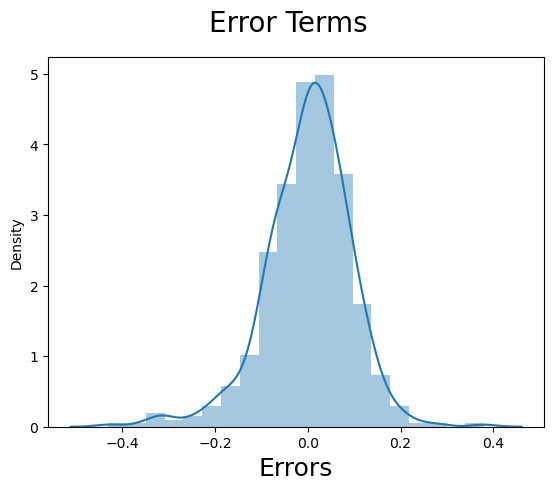

In [1033]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

#### Observations

From the above plot, we can observe that the error values are centered around the mean 0, and follow a normal distribution. Hence, the assumption of Linear Regression, i.e "error terms are normally distributed with mean zero" holds true for our model.

#### 2. y-pred v/s y-test

Text(0, 0.5, 'y_test_pred')

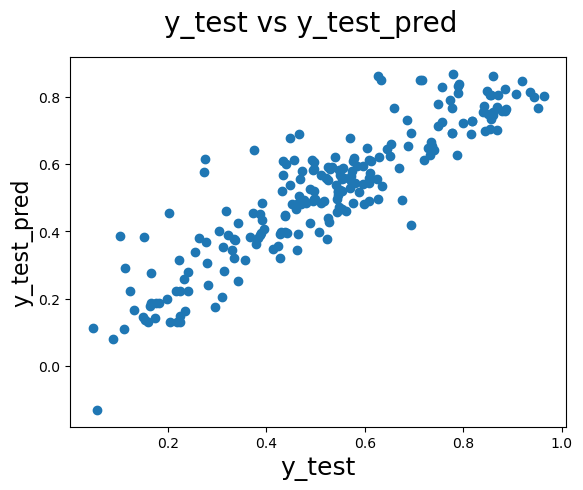

In [1034]:
# Plotting y_test and y_test_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

#### Observations

From the plot of predicted y_test and actual y_test, we can observe that there is a good agreement between both the values.

#### 3. Actual v/s Predicted - Train Data

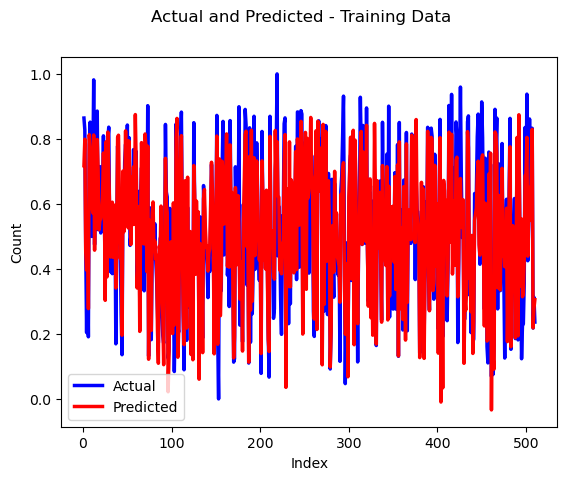

In [1035]:
c = [i for i in range(1, len(X_train) + 1)]
fig = plt.figure() 
plt.plot(c, y_train, color="blue", linewidth=2.5, linestyle="-") 
plt.plot(c, y_train_pred, color="red", linewidth=2.5, linestyle="-")
plt.xlabel('Index')
plt.ylabel('Count')
fig.suptitle('Actual and Predicted - Training Data')
legend_labels = ['Actual', 'Predicted']
legend_colors = ['blue', 'red']
plt.legend(legend_labels)
plt.show()

#### 4. Actual v/s Predicted - Test Data

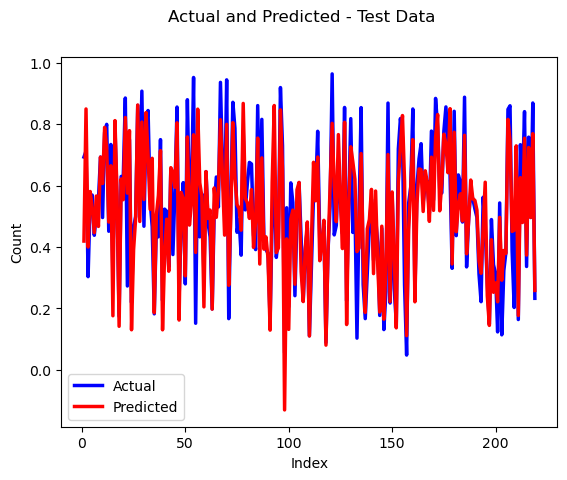

In [1036]:
c = [i for i in range(1, len(X_test) + 1)]
fig = plt.figure() 
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-") 
plt.plot(c, y_test_pred, color="red", linewidth=2.5, linestyle="-")
plt.xlabel('Index')
plt.ylabel('Count')
fig.suptitle('Actual and Predicted - Test Data')
legend_labels = ['Actual', 'Predicted']
legend_colors = ['blue', 'red']
plt.legend(legend_labels)
plt.show()

#### Observations

There is good agreement between the predicted and actual values in both training and test sets.

#### 5. Plotting Error Terms - Train Data

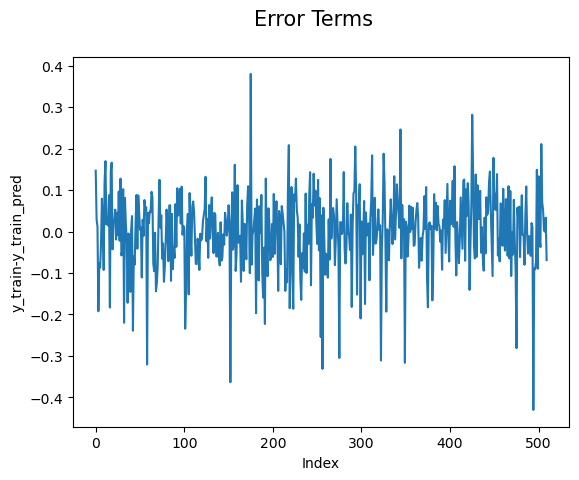

In [1037]:
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### 6. Plotting Error Terms - Test Data

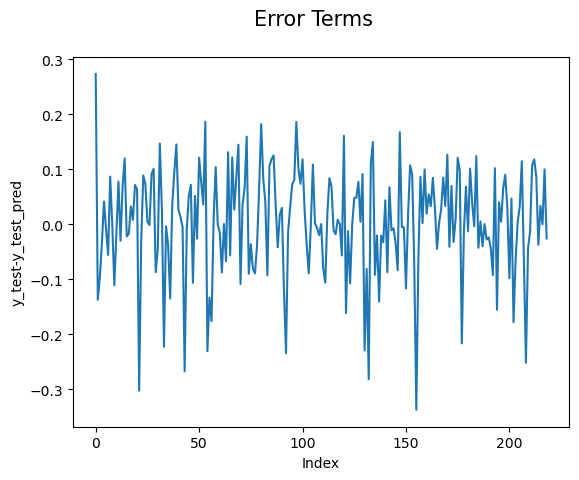

In [1038]:
c = [i for i in range(0,len(X_test),1)]
plt.plot(c,y_test-y_test_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_test-y_test_pred')
plt.show()

Text(0, 0.5, 'Counts - Predicted Counts')

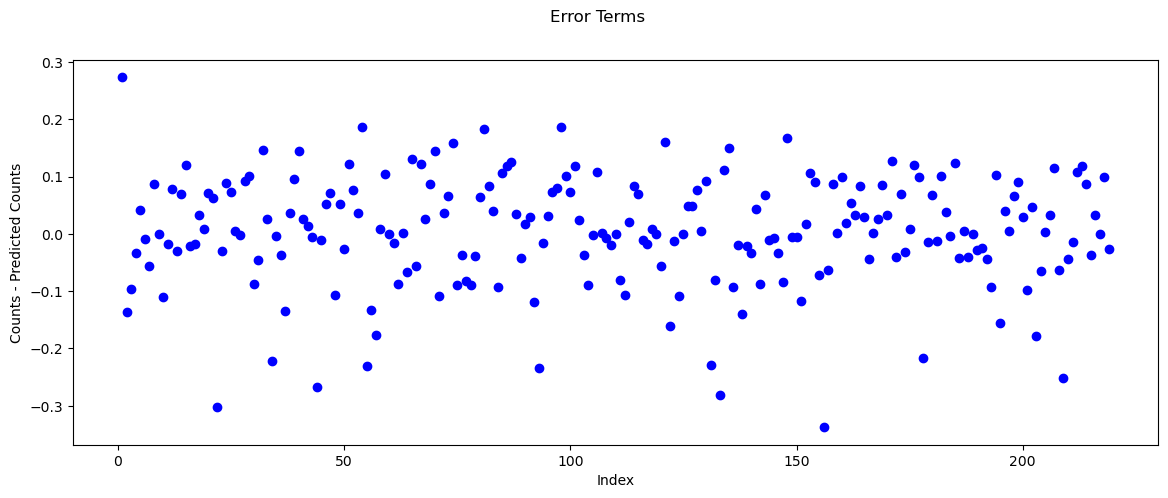

In [1039]:
# Error terms
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test-y_test_pred, color="blue", marker='o', linewidth=2.5, linestyle="")
fig.suptitle('Error Terms')
plt.xlabel('Index')
plt.ylabel('Counts - Predicted Counts')

#### Observations

From the above plots, we are not able to identify any pattern between the error terms. Hence we can conclude that the assumption of Linear Regression, i.e "Error terms are independent of each other", holds true for our model.

#### 7. Checking Homoscedasticity

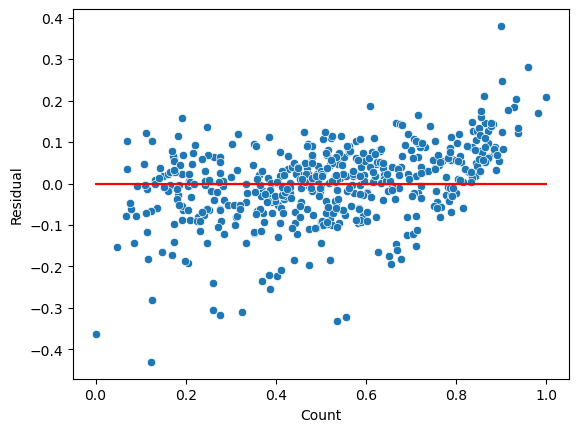

In [1040]:
# Plotting the residuals against the target variable
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### Observations

We are not able to identify any pattern followed by the error terms, i.e we are not able to identify any visible correlation between the error terms and the variables. Hence, we can conclude that the Linear Regression assumption that "Error terms are Homoscedastic" holds true for our model.

#### 8. Multicollinearity Check

In [1041]:
# Checking VIF values of our finalised model
VIF_calc(X_train_13)

,Features,VIF
3,windspeed,3.94
2,temp,3.75
0,yr,2.05
4,spring,1.65
7,mist,1.50
5,winter,1.37
8,month_09,1.16
6,light snow,1.08
1,holiday,1.04


#### Observations

VIF values of all 9 predictor variables are below 5, and hence there is no multicollinearity in our model.

## XII) Conclusion and Recommendations

We have finalised our Linear Regression model after building 13 different models. We have succesfully validated and evaluated our model, and all the model parameters like adjusted R-squared value, p-values, VIFs, Durbin-Watson coefficient, F-statistic are good. We have also validated the Linear Regression assumptions and have observed that none of the assumptions are getting violated.

The final equation of our best fitted line is:

$ cnt = (0.408  \times  temp) + (0.235  \times  yr) + (0.070 \times month09) + (0.048 \times winter) - (0.097 \times holiday) - (0.135 \times windspeed) - (0.116 \times spring) - (0.288 \times light snow) - (0.079 \times mist)  + 0.2671 $

Below are the coefficient values obtained for the predictor variables:

In [1042]:
lm.params

const         0.267078
yr            0.235355
holiday      -0.097018
temp          0.407826
windspeed    -0.135566
spring       -0.116181
winter        0.047958
light snow   -0.288462
mist         -0.078597
month_09      0.069984
dtype: float64

#### R-squared Values Obtained

1. R-squared (Training Set) : 0.827
2. Adj. R-squared (Training Set) : 0.816
3. R-squared (Test Set) : 0.804

#### Top-5 predictor variables based on magnitude of the coefficient:

1. temp : 0.407
2. light snow (weather situation) : -0.288
3. yr (year) : 0.235
4. windspeed : -0.135
5. spring : -0.116

Hence, we can see that the above 5 variables (in that order) are the top 5 ones that are affecting the rental count of bikes.

#### Recommendations

1. Rental count is increasing with increasing ambient temperature, which implies that customers tend to prefer using the service on warm days and are avoiding it on cold days. It is possible that on cold days, they may be using their cars instead for better weather protection and comfort. To address this, BoomBikes can consider providing thermal jackets along with the bikes for a very nominal charge. They can initially offer the jackets for free as an introductory offer to gain traction, and later on start charging for it once the demand stabilises. The users can return the jackets along with the bike once they are done with the ride.
2. Users tend to avoid using rental bikes when there is light snow and rain. Hence, similar to the recommendation above, rain coats can also be offered for use as free throughout the ride. The pricing strategy can also be kept such that rental charges are lower in these conditions when there is low demand.
3. The company needs to ensure that the customers are indeed returning the jackets and rain coats at the end of the ride and not taking them home. For this, they can come up attach an RFID tag or a QR sticker printed on each jacket, which the user has to scan while returning the bike.
4. It is observed that 2019 had much higher rental count than 2018. This is a positive sign that the market for rental bikes is still growing at a good pace and the company should go all out on marketing to gain public attention and traction. Come up with creative advertising advertising campaigns on social media highlighting the benefits of bike sharing, and how it can be a very cost effective alternative compared to using a private vehicle.
5. Windspeed has a negative impact on rental count, which means customers avoid using the service on windy days. The above recommendation of providing jackets should address this point as well.
6. Rental count (and in turn, demand) is highest in the summer (June-August) and fall months (September-November), as these months have predictable and pleasant weather. Hence, focus on aggressive marketing during these months.